Import bibliotek oraz danych

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('TrainingData.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


Rozmiar danych i podstawowe informacje

In [5]:
df.shape

(252000, 13)

In [6]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


Sprawdzenie ilości pustych danych

In [7]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
print(sorted(df['Married/Single'].unique()))
print(sorted(df['House_Ownership'].unique()))
print(sorted(df['Car_Ownership'].unique()))
print(sorted(df['Profession'].unique()))

['married', 'single']
['norent_noown', 'owned', 'rented']
['no', 'yes']
['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant', 'Comedian', 'Computer_hardware_engineer', 'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician', 'Psychologist', 'Scientist', 'Secretary', 'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer', 'Technician', 'Technology_specialist', 'Web_designer']


LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
df1=df
le = LabelEncoder()
df1['Married/Single'] = le.fit_transform(df1['Married/Single'])
df1['House_Ownership'] = le.fit_transform(df1['House_Ownership'])
df1['Car_Ownership'] = le.fit_transform(df1['Car_Ownership'])
df1['Profession'] = le.fit_transform(df1['Profession'])
df1['CITY'] = le.fit_transform(df1['CITY'])
df1['STATE'] = le.fit_transform(df1['STATE'])
df1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,233,18,0,10,0


In [10]:
df1 = df1.drop(columns  = ['Id'], axis=1)

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Married/Single'}>,
        <AxesSubplot:title={'center':'House_Ownership'}>,
        <AxesSubplot:title={'center':'Car_Ownership'}>],
       [<AxesSubplot:title={'center':'Profession'}>,
        <AxesSubplot:title={'center':'CITY'}>,
        <AxesSubplot:title={'center':'STATE'}>],
       [<AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>,
        <AxesSubplot:title={'center':'Risk_Flag'}>]], dtype=object)

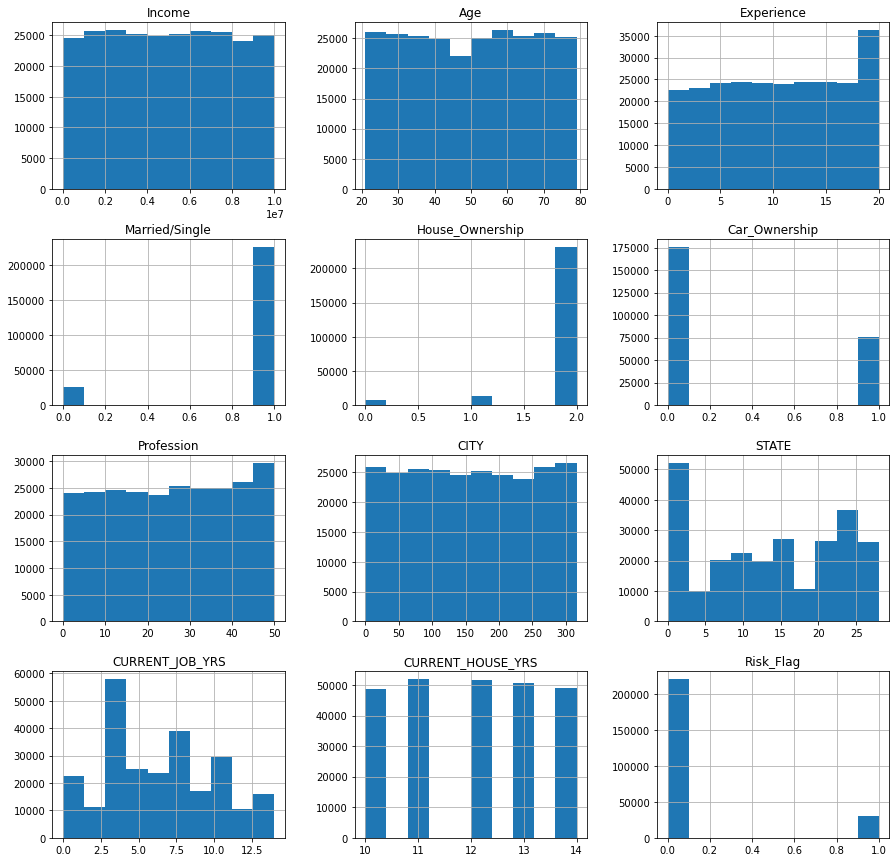

In [11]:
df1.hist(figsize=(15,15))

OneHotEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
dfohe=pd.read_csv('TrainingData.csv')

dfohe1 = pd.DataFrame(ohe.fit_transform(dfohe[["Car_Ownership"]]).toarray())
dfohe.insert(6, 'Car_Ownership_no', dfohe1[0])
dfohe.insert(7, 'Car_Ownership_yes', dfohe1[1])
dfohe=dfohe.drop(columns=['Car_Ownership'])

dfohe1 = pd.DataFrame(ohe.fit_transform(dfohe[["Married/Single"]]).toarray())
dfohe.insert(6, 'Married', dfohe1[0])
dfohe.insert(7, 'Single', dfohe1[1])
dfohe=dfohe.drop(columns=['Married/Single'])


le = LabelEncoder()
dfohe['House_Ownership'] = le.fit_transform(dfohe['House_Ownership'])
dfohe['Profession'] = le.fit_transform(dfohe['Profession'])
dfohe['CITY'] = le.fit_transform(dfohe['CITY'])
dfohe['STATE'] = le.fit_transform(dfohe['STATE'])
dfohe

#Married/Single: 1=single 0=married
#House_Ownership: 2=rented 1=norent_noown 0=owned
#Car_Ownership: 1=yes 0=no

,Id,Income,Age,Experience,House_Ownership,Married,Single,Car_Ownership_no,Car_Ownership_yes,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,2,0.0,1.0,1.0,0.0,33,251,13,3,13,0
1,2,7574516,40,10,2,0.0,1.0,1.0,0.0,43,227,14,9,13,0
2,3,3991815,66,4,2,1.0,0.0,1.0,0.0,47,8,12,4,10,0
3,4,6256451,41,2,2,0.0,1.0,0.0,1.0,43,54,17,2,12,1
4,5,5768871,47,11,2,0.0,1.0,1.0,0.0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,2,0.0,1.0,1.0,0.0,45,162,28,6,11,0
251996,251997,2843572,26,10,2,0.0,1.0,1.0,0.0,3,251,13,6,11,0
251997,251998,4522448,46,7,2,0.0,1.0,1.0,0.0,17,144,14,7,12,0
251998,251999,6507128,45,0,2,0.0,1.0,1.0,0.0,27,233,18,0,10,0


Zmiana typu danych utworzonych przez OneHotEncoder z float na int

In [13]:
dfohe.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience             int64
House_Ownership        int32
Married              float64
Single               float64
Car_Ownership_no     float64
Car_Ownership_yes    float64
Profession             int32
CITY                   int32
STATE                  int32
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS      int64
Risk_Flag              int64
dtype: object

In [14]:
dfohe[['Married', 'Single', 'Car_Ownership_no', 'Car_Ownership_yes']] = dfohe[['Married', 'Single', 'Car_Ownership_no', 'Car_Ownership_yes']].convert_dtypes(int)

In [15]:
dfohe = dfohe.drop(columns  = ['Id'], axis=1)

In [16]:
dfohe

,Income,Age,Experience,House_Ownership,Married,Single,Car_Ownership_no,Car_Ownership_yes,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,2,0,1,1,0,33,251,13,3,13,0
1,7574516,40,10,2,0,1,1,0,43,227,14,9,13,0
2,3991815,66,4,2,1,0,1,0,47,8,12,4,10,0
3,6256451,41,2,2,0,1,0,1,43,54,17,2,12,1
4,5768871,47,11,2,0,1,1,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,2,0,1,1,0,45,162,28,6,11,0
251996,2843572,26,10,2,0,1,1,0,3,251,13,6,11,0
251997,4522448,46,7,2,0,1,1,0,17,144,14,7,12,0
251998,6507128,45,0,2,0,1,1,0,27,233,18,0,10,0


In [17]:
X = dfohe.drop(columns  = ['Risk_Flag'], axis=1)
y = dfohe['Risk_Flag']

## Przykładowy trening

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### K najbliższych sąsiadów

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
acc_k=accuracy_score(y_pred, y_test)
print('Acc= ', acc_k)

Acc=  0.8881216931216931


In [21]:
l = np.arange(0.1, 1, 0.1)
l = l.round(1)
for i in l:
    y_pred_2 = (model.predict_proba(X_test)[:,1] >= i)
    acc = accuracy_score(y_test, y_pred_2).round(3)
    recall = recall_score(y_test, y_pred_2).round(3)
    f1 = f1_score(y_test, y_pred_2).round(3)
    p = precision_score(y_test, y_pred_2).round(3)
    print('Treshold: ' + str(i) + '\tAccuracy: ' + str(acc) + '\tRecall: ' + str(recall) + '\tF1: ' + str(f1) + '\tPrecision: ' + str(p))

Treshold: 0.1	Accuracy: 0.855	Recall: 0.854	F1: 0.592	Precision: 0.454
Treshold: 0.2	Accuracy: 0.855	Recall: 0.854	F1: 0.592	Precision: 0.454
Treshold: 0.3	Accuracy: 0.88	Recall: 0.7	F1: 0.589	Precision: 0.508
Treshold: 0.4	Accuracy: 0.88	Recall: 0.7	F1: 0.589	Precision: 0.508
Treshold: 0.5	Accuracy: 0.888	Recall: 0.488	F1: 0.518	Precision: 0.551
Treshold: 0.6	Accuracy: 0.888	Recall: 0.488	F1: 0.518	Precision: 0.551
Treshold: 0.7	Accuracy: 0.886	Recall: 0.243	F1: 0.345	Precision: 0.593
Treshold: 0.8	Accuracy: 0.886	Recall: 0.243	F1: 0.345	Precision: 0.593
Treshold: 0.9	Accuracy: 0.88	Recall: 0.06	F1: 0.11	Precision: 0.606


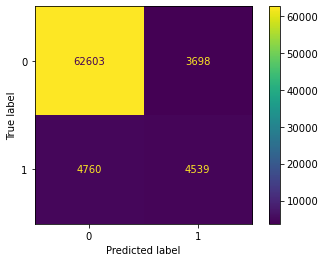

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
roc_auc_score(y_test, y_pred)

0.7161705354233602

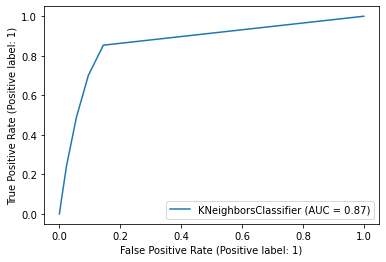

In [24]:
plot_roc_curve(model, X_test, y_test) 